In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
data = pd.read_csv("SalaryData.csv")
data_top = data.head()  

In [3]:
t = data['Salary']
x = data['YearsExperience']
H = np.array([[[1,y**1,y**2,y**3]] for y in x])
m_zero = np.array([[40000], [0], [0], [0]])
P_zero = np.identity(4)*100
sigma = 250

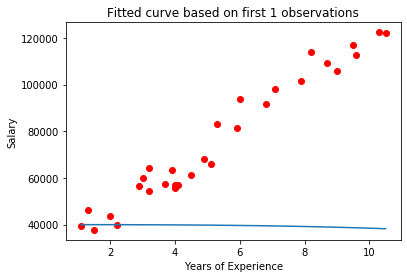

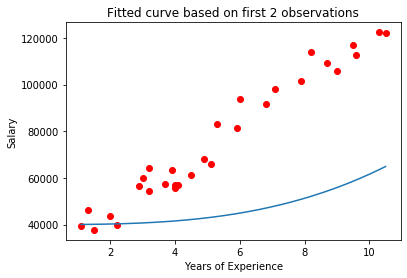

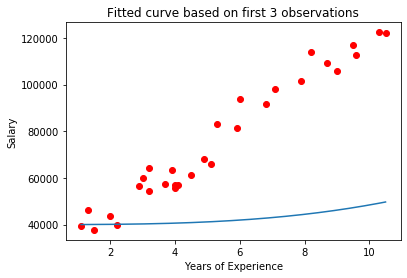

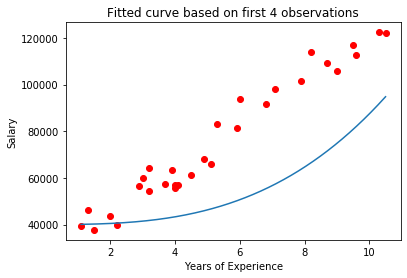

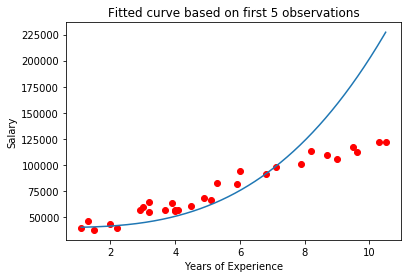

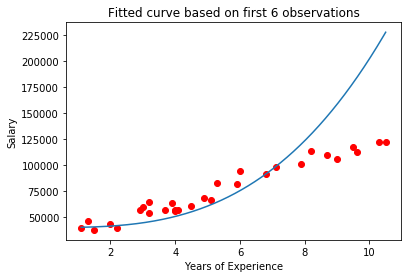

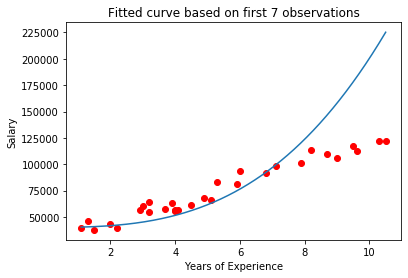

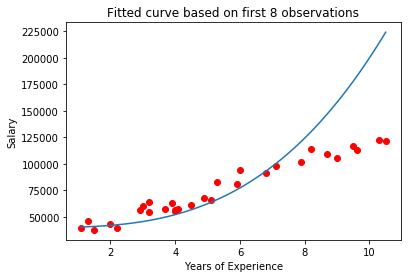

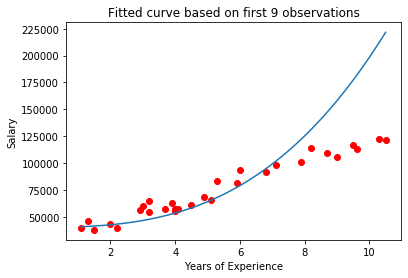

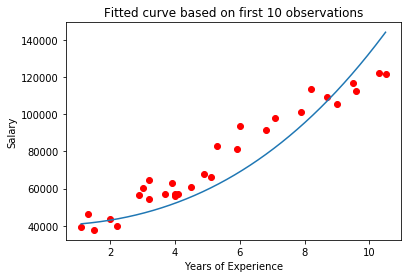

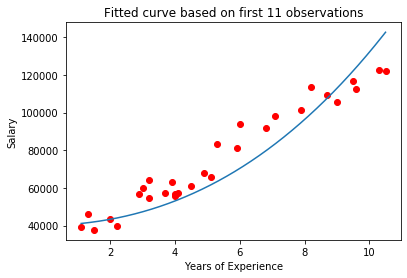

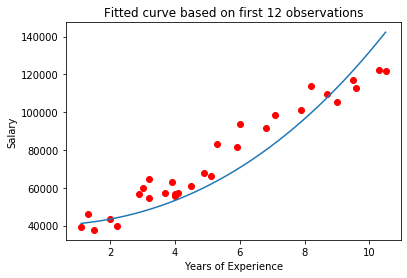

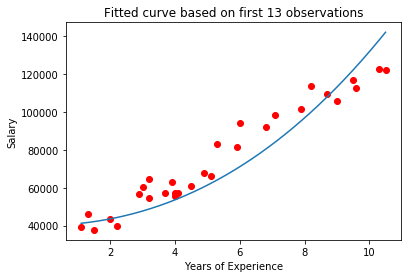

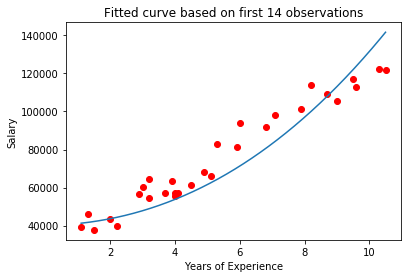

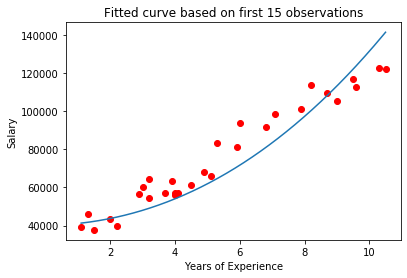

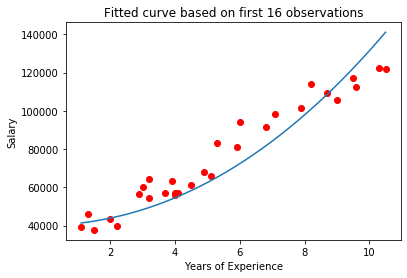

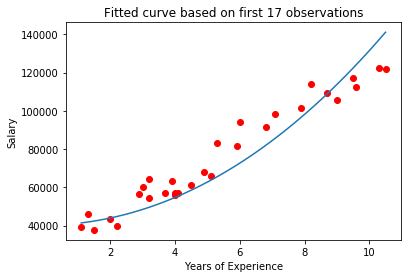

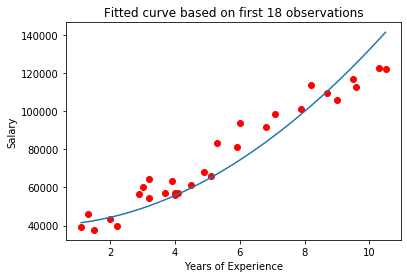

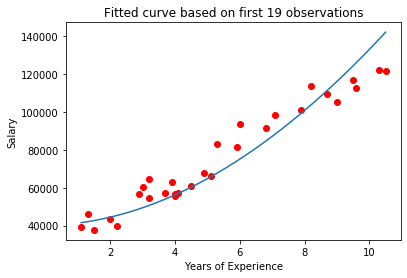

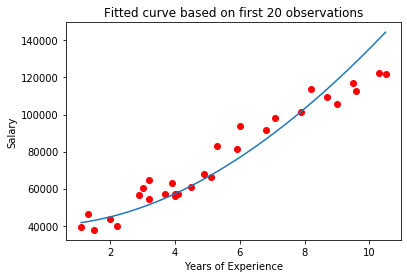

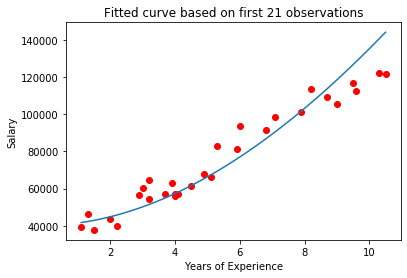

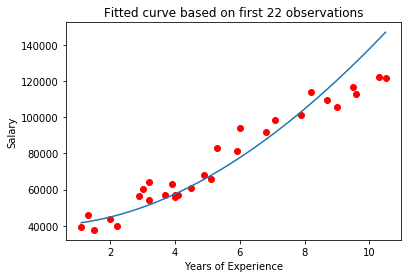

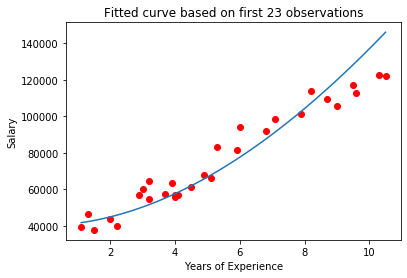

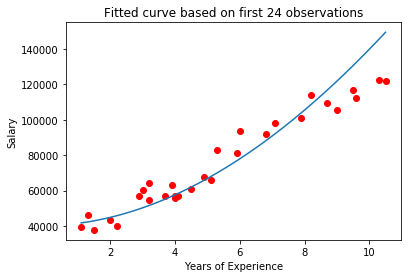

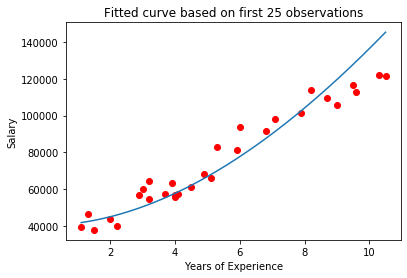

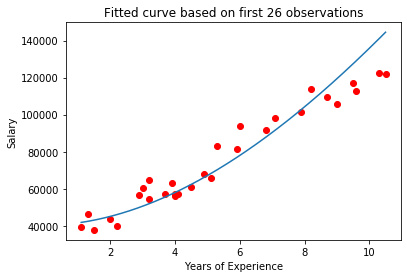

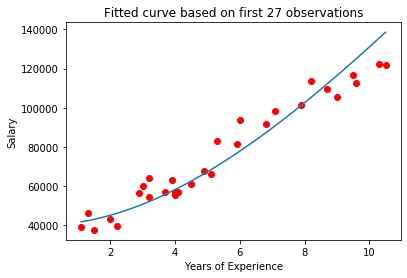

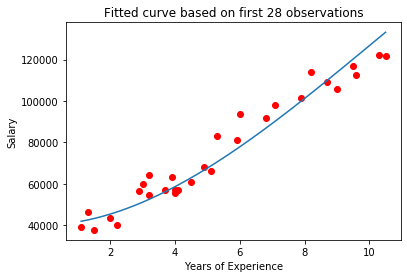

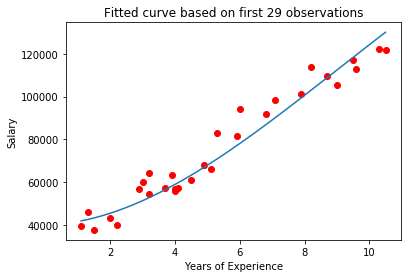

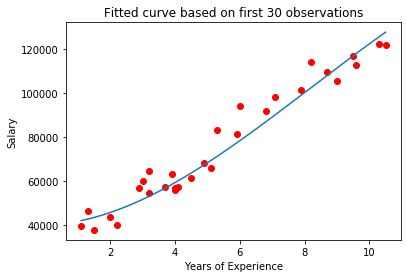

In [6]:
m_k = np.zeros((len(x)+1, 4, 1))
P_k = np.zeros((len(x)+1, 4, 4))

P_k[0] = P_zero
m_k[0] = m_zero

for k in range(1, len(x)+1):
    P_k[k] = P_k[k-1] - P_k[k-1] @ H[k-1].T * 1/(H[k-1] @ P_k[k-1] @ H[k-1].T + sigma**2) @ H[k-1] @ P_k[k-1]
    m_k[k] = P_k[k] @ (H[k-1].T * sigma**(-2) * t[k-1] + np.linalg.inv(P_k[k-1]) @ m_k[k-1])
    
    #Plotting 
    plt.plot(x, t,  'o', color='red')
    xs = np.linspace(min(x),max(x),5000)
    plt.plot(xs, 1*m_k[k][0] + xs * m_k[k][1] + xs**2 * m_k[k][2] + xs**3 * m_k[k][3])
    plt.title('Fitted curve based on first %d observations' % k)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()